## Import spectral sample (380-780nm)

In [1]:
import colour
import numpy

SAMPLE_FILE_PATH = './data/sample-led-01.csv'

# Load data from CSV file
data = numpy.genfromtxt(SAMPLE_FILE_PATH, delimiter=',', skip_header=True)

# Take only the first two columns (wavelength and measurement 1)
data = data[:, :2]

# Convert the array of arrays to a dictionary
data = dict(data)

# Create a colour spectral distribution object from the data
sd = colour.SpectralDistribution(data)

## [1] Display as full report

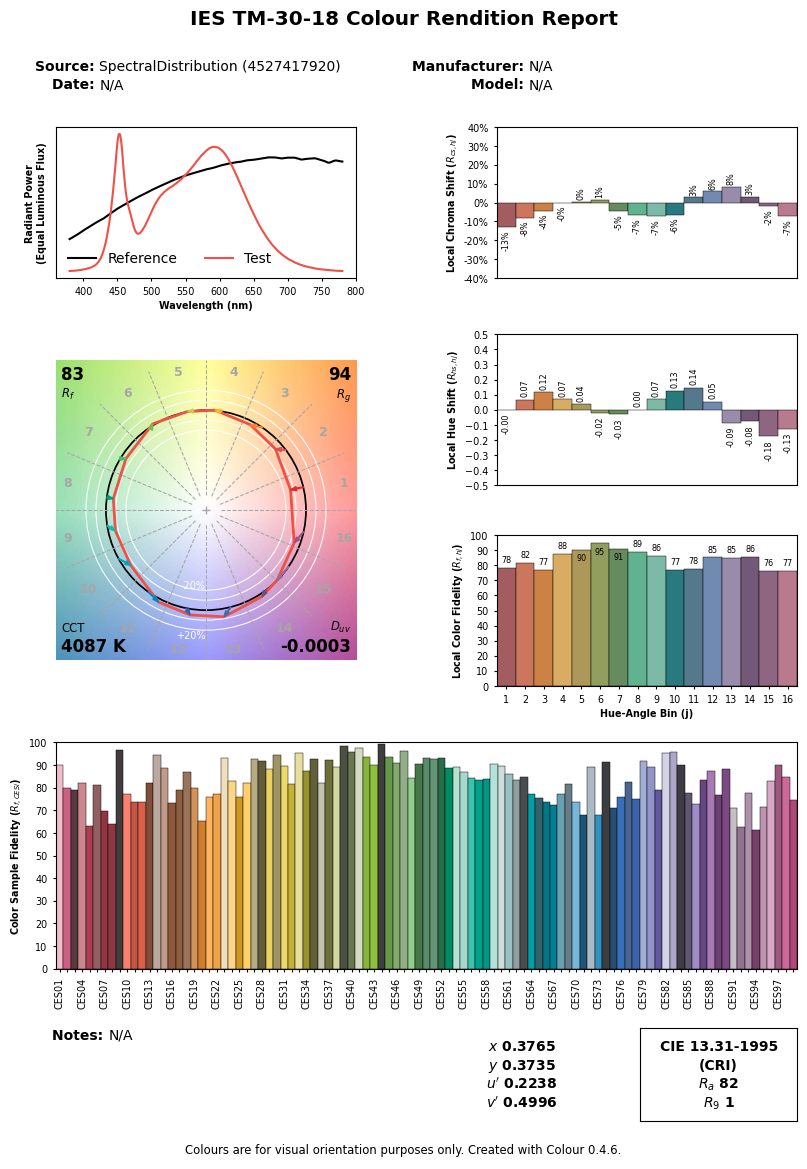

In [2]:
# Plot the TM-30-18 colour rendition report
with colour.utilities.suppress_warnings(colour_usage_warnings=True):
    plt, _ = colour.plotting.plot_single_sd_colour_rendition_report(sd, 'full')

## [2] Display as numerical data

In [3]:
def floats_to_str(floats, precision):
    return ' '.join(
        [f'{i}={v:.{precision}f}%' for i, v in enumerate(floats, 1)]
    )


specification = colour.quality.colour_fidelity_index_ANSIIESTM3018(sd, True)
CRI_spec = colour.quality.colour_rendering_index(specification.sd_test, True)
XYZ = colour.colorimetry.sd_to_XYZ(specification.sd_test)
xy = colour.models.XYZ_to_xy(XYZ)
Luv = colour.models.XYZ_to_Luv(XYZ, xy)
uv_p = colour.models.Luv_to_uv(Luv, xy)

print(f'CCT (K): {specification.CCT:.0f}')
print(f'Duv: {specification.D_uv:.4f}')
print(f'Fidelity index (Rf): {specification.R_f:.0f}')
print(f'Gamut index (Rg): {specification.R_g:.0f}')

print()
print('CIE 13.31-1995 (CRI):')
print(f'Ra: {CRI_spec.Q_a:.0f}')
print(f'R9: {CRI_spec.Q_as[9].Q_a:.0f}')

print()
print(f'x: {xy[0]:.4f}')
print(f'y: {xy[1]:.4f}')
print(f'u\': {uv_p[0]:.4f}')
print(f'v\': {uv_p[1]:.4f}')

print()
print('Local Chroma shift (Rcs,hj):', floats_to_str(specification.R_cs, 0))
print('Local Hue Shift (Rhs,hj):', floats_to_str(specification.R_hs, 2))
print('Local Color Fidelity (Rf,hj):', floats_to_str(specification.R_fs, 0))
print('Sample Color Fidelity (Rf,cesi):', floats_to_str(specification.R_s, 0))

CCT (K): 4087
Duv: -0.0003
Fidelity index (Rf): 83
Gamut index (Rg): 94

CIE 13.31-1995 (CRI):
Ra: 82
R9: 1

x: 0.3765
y: 0.3735
u': 0.2238
v': 0.4996

Local Chroma shift (Rcs,hj): 1=-13% 2=-8% 3=-4% 4=-0% 5=0% 6=1% 7=-5% 8=-7% 9=-7% 10=-6% 11=3% 12=6% 13=8% 14=3% 15=-2% 16=-7%
Local Hue Shift (Rhs,hj): 1=-0.00% 2=0.07% 3=0.12% 4=0.07% 5=0.04% 6=-0.02% 7=-0.03% 8=0.00% 9=0.07% 10=0.13% 11=0.14% 12=0.05% 13=-0.09% 14=-0.08% 15=-0.18% 16=-0.13%
Local Color Fidelity (Rf,hj): 1=78% 2=82% 3=77% 4=88% 5=90% 6=95% 7=91% 8=89% 9=86% 10=77% 11=78% 12=85% 13=85% 14=86% 15=76% 16=77%
Sample Color Fidelity (Rf,cesi): 1=90% 2=80% 3=79% 4=82% 5=63% 6=81% 7=70% 8=64% 9=96% 10=77% 11=74% 12=74% 13=82% 14=94% 15=89% 16=73% 17=79% 18=87% 19=80% 20=65% 21=76% 22=77% 23=93% 24=83% 25=76% 26=82% 27=92% 28=92% 29=88% 30=94% 31=90% 32=82% 33=95% 34=87% 35=93% 36=82% 37=92% 38=89% 39=98% 40=96% 41=97% 42=94% 43=90% 44=99% 45=94% 46=91% 47=96% 48=84% 49=90% 50=93% 51=93% 52=93% 53=89% 54=89% 55=87% 56=84% 57=8